In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
def label_encode(df, col_name):
    label_encoder = LabelEncoder()
    label_encoder.fit(df[col_name])
    df[col_name] = label_encoder.transform(df[col_name])

In [ ]:
data = pd.read_csv('dataset_phishing_complete.csv')
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [ ]:
print(f"The data has {data.shape[0]} rows")
print(f"The data has {data.shape[1]} columns")

The data has 11430 rows
The data has 89 columns


In [ ]:
label_encode(data, 'status')
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


### Legitimate -> 0 & Phishing -> 1

## Checking for null Values

In [ ]:
data.isna().sum().sort_values(ascending= False)

url                     0
longest_words_raw       0
ratio_extErrors         0
ratio_intErrors         0
ratio_extRedirection    0
                       ..
punycode                0
ratio_digits_host       0
ratio_digits_url        0
https_token             0
status                  0
Length: 89, dtype: int64

In [ ]:
data.status.value_counts()

0    5715
1    5715
Name: status, dtype: int64

In [ ]:
X = data.drop(['url', 'status'], axis= 1)
y = data['status']
X.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,...,0,0,1,0,45,-1,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,...,0,1,0,0,77,5767,0,0,1,2
2,126,50,1,4,1,0,1,2,0,3,...,0,1,0,0,14,4004,5828815,0,1,0
3,18,11,0,2,0,0,0,0,0,0,...,0,1,0,0,62,-1,107721,0,0,3
4,55,15,0,2,2,0,0,0,0,0,...,0,0,1,0,224,8175,8725,0,0,6


## Train Test Split (80:20)

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(17)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
len(X_train), len(X_test)

(9144, 2286)

## Selecting features based on correlation

In [ ]:
train_data = X_train
train_data['Target'] = y_train
train_data.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,Target
1374,30,13,0,2,0,0,0,0,0,0,...,1,0,0,139,2053,6980407,0,1,0,1
7472,91,11,0,3,5,0,0,0,0,0,...,1,0,0,0,-1,6431,0,0,6,0
10757,154,40,0,2,2,0,1,0,0,1,...,1,0,0,381,8019,0,0,1,4,1
7327,99,15,0,2,0,0,0,0,0,0,...,1,1,0,2975,8347,1,0,1,10,1
4412,43,36,0,4,0,0,0,0,0,0,...,1,1,0,181,4202,0,0,1,0,1


In [ ]:
related = train_data.corr()['Target'].sort_values(ascending = False)
related[:12]

Target                1.000000
google_index          0.728981
ratio_digits_url      0.356585
domain_in_title       0.349530
phish_hints           0.340455
ip                    0.319089
nb_qm                 0.296130
length_url            0.246249
nb_slash              0.241729
length_hostname       0.238769
nb_eq                 0.233713
shortest_word_host    0.226572
Name: Target, dtype: float64

### Correlation NaN is because the column values are filled with a single value throughout

In [ ]:
train_data['ratio_nullHyperlinks'].value_counts()

0    9144
Name: ratio_nullHyperlinks, dtype: int64

In [ ]:
data['ratio_nullHyperlinks'].value_counts()

0    11430
Name: ratio_nullHyperlinks, dtype: int64

In [ ]:
X_features = []
for i in range (len(related)):
    if abs(related[i]) > 0.24 and related[i] < 1:
        X_features.append(related.index[i])
X_features

['google_index',
 'ratio_digits_url',
 'domain_in_title',
 'phish_hints',
 'ip',
 'nb_qm',
 'length_url',
 'nb_slash',
 'ratio_intHyperlinks',
 'domain_age',
 'nb_hyperlinks',
 'nb_www',
 'page_rank']

## Plotting the correlation heatmap of the chosen features

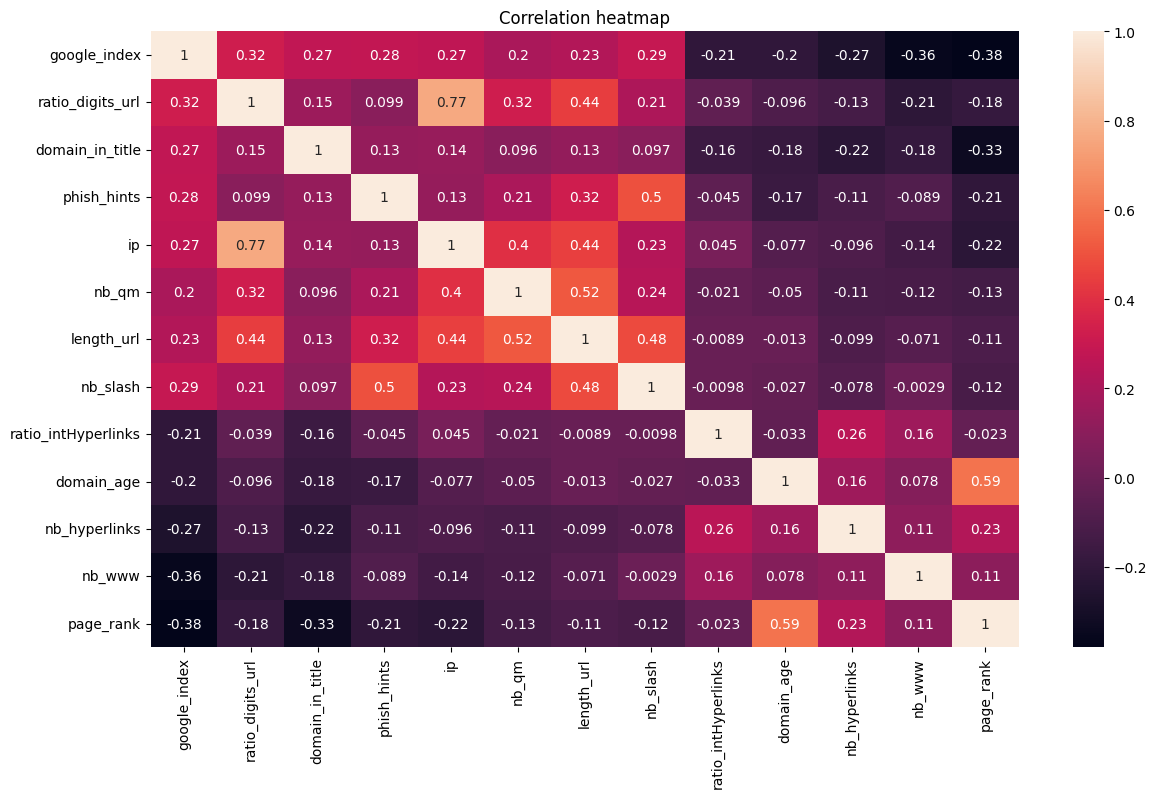

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize= (14,8))
ax.set_title('Correlation heatmap')
sns.heatmap(train_data[X_features].corr(), annot= True);

In [ ]:
corr_matrix = train_data[X_features].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper

,google_index,ratio_digits_url,domain_in_title,phish_hints,ip,nb_qm,length_url,nb_slash,ratio_intHyperlinks,domain_age,nb_hyperlinks,nb_www,page_rank
google_index,NaN,0.320737,0.274652,0.280366,0.268021,0.199109,0.227002,0.291854,0.205428,0.204098,0.272245,0.357292,0.380372
ratio_digits_url,NaN,NaN,0.154049,0.098959,0.766037,0.323179,0.441329,0.210960,0.039180,0.096036,0.128487,0.214762,0.184206
domain_in_title,NaN,NaN,NaN,0.134405,0.140833,0.096465,0.128324,0.096709,0.163770,0.175937,0.219724,0.183689,0.334512
phish_hints,NaN,NaN,NaN,NaN,0.132164,0.205334,0.324126,0.497141,0.044948,0.168320,0.114574,0.088745,0.205599
ip,NaN,NaN,NaN,NaN,NaN,0.401198,0.444783,0.233922,0.045275,0.077026,0.095631,0.142886,0.220348
nb_qm,NaN,NaN,NaN,NaN,NaN,NaN,0.517873,0.241724,0.021452,0.049954,0.111026,0.121130,0.134234
length_url,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.478694,0.008888,0.012837,0.098971,0.071383,0.105269
nb_slash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009802,0.026844,0.077784,0.002901,0.120534
ratio_intHyperlinks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033339,0.255282,0.162669,0.023361
domain_age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.160440,0.078198,0.594211


In [ ]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.65)]
to_drop.append('phish_hints')
to_drop.append('page_rank')
to_drop.append('ratio_intHyperlinks')
to_drop.append('domain_in_title')
to_drop.append('nb_hyperlinks')
to_drop

['ip',
 'phish_hints',
 'page_rank',
 'ratio_intHyperlinks',
 'domain_in_title',
 'nb_hyperlinks']

In [ ]:
for col in to_drop:
    X_features.remove(col)
X_features

['google_index',
 'ratio_digits_url',
 'nb_qm',
 'length_url',
 'nb_slash',
 'domain_age',
 'nb_www']

In [ ]:
X_features

['google_index',
 'ratio_digits_url',
 'nb_qm',
 'length_url',
 'nb_slash',
 'domain_age',
 'nb_www']

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train[X_features], y_train)
clf.score(X_train[X_features], y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8650481189851269

## Applying KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors= 10)
clf.fit(X_train[X_features], y_train);

In [ ]:
print(f"Train Score: {clf.score(X_train[X_features], y_train)}")
print(f"Test Score: {clf.score(X_test[X_features], y_test)}")

Train Score: 0.8510498687664042
Test Score: 0.8197725284339458


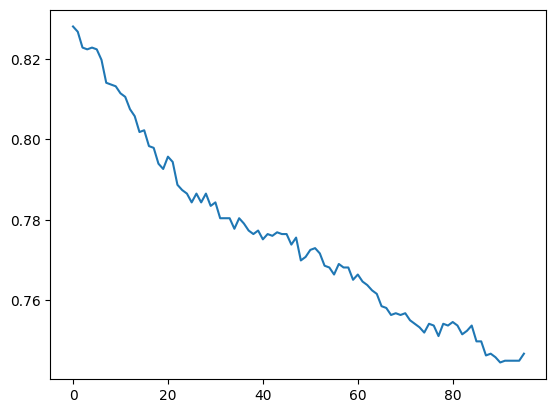

In [ ]:
scores = []
for n in range(4, 100):
    clf = KNeighborsClassifier(n_neighbors= n)
    clf.fit(X_train[X_features], y_train)
    scores.append(clf.score(X_test[X_features], y_test))
plt.plot(scores);

## Using SVC with rbf kernel

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel= 'rbf')
clf.fit(X_train[X_features], y_train);

In [ ]:
print(f"Train Score: {clf.score(X_train[X_features], y_train)}")
print(f"Test Score: {clf.score(X_test[X_features], y_test)}")

Train Score: 0.666994750656168
Test Score: 0.6710411198600175


## Using decision tree classifier

In [ ]:
X_features

['google_index',
 'ratio_digits_url',
 'nb_qm',
 'length_url',
 'nb_slash',
 'domain_age',
 'nb_www']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth= 8)
clf.fit(X_train[X_features], y_train);

In [ ]:
print(f"Train Score: {clf.score(X_train[X_features], y_train):.4f}")
print(f"Test Score: {clf.score(X_test[X_features], y_test):.4f}")

Train Score: 0.9338
Test Score: 0.9129


## Using ROC curves

In [ ]:
X_test[X_features].shape

(2286, 7)

In [ ]:
y_probs = clf.predict_proba(X_test[X_features])
y_probs[:10]

array([[0.93527508, 0.06472492],
       [0.10509886, 0.89490114],
       [1.        , 0.        ],
       [0.98798077, 0.01201923],
       [1.        , 0.        ],
       [0.98798077, 0.01201923],
       [0.04647676, 0.95352324],
       [0.98798077, 0.01201923],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [ ]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.06472492, 0.89490114, 0.        , 0.01201923, 0.        ,
       0.01201923, 0.95352324, 0.01201923, 0.        , 0.        ])

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

AUC score: 0.9590718433577743


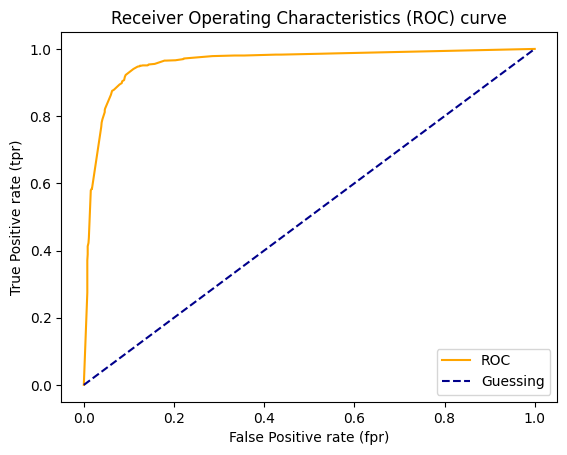

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
def plot_ROC(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and
    true positive rate (tpr) of a model
    """
    plt.plot(fpr, tpr, color= 'orange', label= 'ROC')

    # Baseline
    plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--', label= 'Guessing')

    plt.xlabel('False Positive rate (fpr)')
    plt.ylabel('True Positive rate (tpr)')
    plt.title('Receiver Operating Characteristics (ROC) curve')
    plt.legend()
    plt.show()

print(f"AUC score: {roc_auc_score(y_test, y_probs_positive)}")
plot_ROC(fpr, tpr)

## Pls change the color

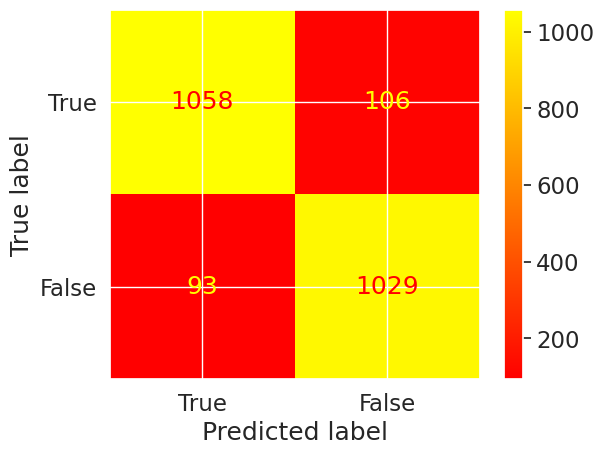

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
sns.set(font_scale= 1.5)
y_preds = clf.predict(X_test[X_features])
conf_matrix = confusion_matrix(y_test, y_preds)
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels= [True, False])
cm_display.plot(cmap= 'autumn')
plt.show()

In [ ]:
import pickle
pickle.dump(clf, open("Phishing_Detector_Model_DT_7.pkl", 'wb'))